# 吴恩达深度学习课程一（Week3）

### 测验

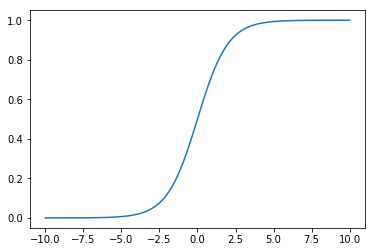

In [19]:
import matplotlib.pyplot as plt
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.show()

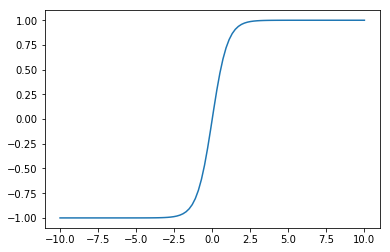

In [21]:
y_ = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
plt.plot(x,y_)
plt.show()

In [22]:
print(np.random.randn(4,3))

[[-0.36304205 -0.59303962 -2.19854429]
 [-0.19574297  2.08627799 -1.57495775]
 [-0.23098382  0.10425091  0.56781159]
 [ 0.24802108  0.01062336 -0.02375851]]


### 编程作业


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases import *
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets

%matplotlib inline

np.random.seed(1)

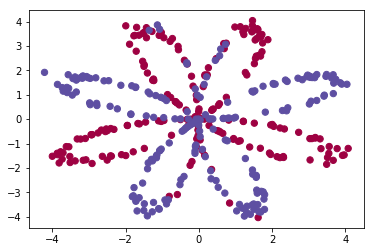

In [102]:
X,Y = load_planar_dataset()
plt.scatter(X[0,:],X[1,:],c=np.squeeze(Y),s=40,cmap=plt.cm.Spectral)


In [19]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]

print('X的维度：',shape_X)
print("Y的维度：",shape_Y)
print("数据集总量：",m)

X的维度： (2, 400)
Y的维度： (1, 400)
数据集总量： 400


In [22]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 400, 'y' with size 400.

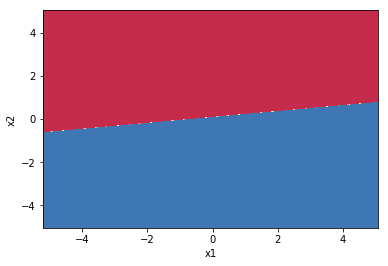

In [103]:
plot_decision_boundary(lambda x:clf.predict(x),X,Y)
plt.title('Logistic Regression')
LR_predictions = clf.predict(X.T)
# print('逻辑回归的准确性：%d'%float((np.dot(Y,LR_predictions)+
#                           np.dot(1-Y,1-LR_predictions))/float(Y.size)*100)+
#                              '%'+'(正确标注的数据点所占的百分比)')

### 搭建神经网络

#### 定义神经网络结构

In [65]:
def layer_sizes(X,Y):
    """
    参数：
    X - 输入数据集 维度
    Y - 标签，维度
    返回：
    n_x - 输入层节点数量
    n_h - 隐藏层节点数量
    n_y - 输出层节点数量
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x,n_h,n_y)

In [66]:
print("=================Test================")
X_asses,Y_asses= layer_sizes_test_case()
(n_x,n_h,n_y) = layer_size(X_asses,Y_asses)
print('n_x:',n_x)
print('n_h:',n_h)
print('n_y:',n_y)

=================Test================
n_x: 5
n_h: 4
n_y: 2


#### 初始化模型参数

In [79]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)*0.01#随机值具有标准正态分布
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    parameters={
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    return parameters

In [80]:
print("=================Test================")
n_x,n_h,n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x,n_h,n_y)
print(parameters)

=================Test================
{'W1': array([[-0.00416758, -0.00056267],
       [-0.02136196,  0.01640271],
       [-0.01793436, -0.00841747],
       [ 0.00502881, -0.01245288]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]), 'b2': array([[0.]])}


### 前向传播

In [81]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    cache = {
        'Z1':Z1,
        'A1':A1,
        'Z2':Z2,
        'A2':A2
    }
    return (A2,cache)

In [82]:
print("=================Test================")
X_asses,parameters = forward_propagation_test_case()
A2 , cache = forward_propagation(X_asses,parameters)
print(np.mean(cache['Z1']),
      np.mean(cache['A1']),
     np.mean(cache['Z2']),
     np.mean(cache['A2']))

=================Test================
0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [83]:
def compute_cost(A2,Y,parameters):
    m = Y.shape[1]
    
    cost = (-1/m)*np.sum(np.add(Y*np.log(A2),(1-Y)*np.log(1-A2)))
    cost = float(np.squeeze(cost))
    return cost

In [84]:
print("=================Test================")
A2,Y_asses,parameters = compute_cost_test_case()
print('cost=',compute_cost(A2,Y_asses,parameters))

=================Test================
cost= 0.6930587610394646


### 反向传播

In [85]:
def backward_propagation(parameters,cache,X,Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = A1 - Y
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads={
        'dW1':dW1,
        'db1':db1,
        'dW2':dW2,
        'db2':db2
    }
    return grads

In [86]:
print("=================Test================")
parameters,cache,X_asses,Y_asses = backward_propagation_test_case()

grads = backward_propagation(parameters,cache,X_asses,Y_asses)
print(grads)

=================Test================
{'dW1': array([[-0.36976579,  1.12495379],
       [-0.39458173,  1.17168791],
       [-0.3821017 ,  1.11096364],
       [-0.35548811,  1.09319484]]), 'db1': array([[-0.666869  ],
       [-0.68381903],
       [-0.66252425],
       [-0.65544225]]), 'dW2': array([[ 0.00078841,  0.01765429, -0.00084166, -0.01022527]]), 'db2': array([[-0.16655712]])}


### 参数更新——梯度下降

In [87]:
def update_parameters(parameters,grads,lr=1.2):
    W1,b1,W2,b2=parameters['W1'],parameters['b1'],parameters['W2'],parameters['b2']
    
    dW1,db1,dW2,db2=grads['dW1'],grads['db1'],grads['dW2'],grads['db2']
    
    W1 -= lr*dW1
    b1 -= lr*db1
    W2 -= lr*dW2
    b2 -= lr*db2
    
    parameters={
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    return parameters

In [88]:
print("=================Test================")
parameters ,grads = update_parameters_test_case()
parameters = update_parameters(parameters,grads)
print(parameters)

=================Test================
{'W1': array([[-0.00643025,  0.01936718],
       [-0.02410458,  0.03978052],
       [-0.01653973, -0.02096177],
       [ 0.01046864, -0.05990141]]), 'b1': array([[-1.02420756e-06],
       [ 1.27373948e-05],
       [ 8.32996807e-07],
       [-3.20136836e-06]]), 'W2': array([[-0.01041081, -0.04463285,  0.01758031,  0.04747113]]), 'b2': array([[0.00010457]])}


### 整合模型

In [89]:
def nn_model(X,Y,n_h,num_iter,print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1,b1,W2,b2 = parameters['W1'],parameters['b1'],parameters['W2'],parameters['b2']
    
    for i in range(num_iter):
        A2,cache = forward_propagation(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads,lr=0.5)
        
        if print_cost == True:
            if i%1000 == 0:
                print('第%i次循环，成本为：%f'%(i,cost))
    return parameters

In [91]:
print("=================Test================")
X_asses,Y_asses = nn_model_test_case()

parameters = nn_model(X_asses,Y_asses,4,10000)
print(parameters)

=================Test================
{'W1': array([[ 0.83980285, -1.74549013],
       [ 0.83953654, -1.74566336],
       [ 0.83952955, -1.74566522],
       [ 0.83993262, -1.7454055 ]]), 'b1': array([[2.02428321],
       [2.02427021],
       [2.02426754],
       [2.02428936]]), 'W2': array([[3.94028106, 3.93232202, 3.95671409, 3.97986695]]), 'b2': array([[-7.00731399]])}


### 预测

In [92]:
def predict(parameters,X):
    A2,cache = forward_propagation(X,parameters)
    predictions = np.round(A2)
    return predictions


In [96]:
print("=================Test================")
parameters,X_asses = predict_test_case()
predictions = predict(parameters,X_asses)
print('预测平均值=',np.mean(predictions))

=================Test================
预测平均值= 0.6666666666666666


### 正式运行

第0次循环，成本为：0.693048
第1000次循环，成本为：0.674203
第2000次循环，成本为：0.674023
第3000次循环，成本为：0.674021
第4000次循环，成本为：0.674021
第5000次循环，成本为：0.674021
第6000次循环，成本为：0.674021
第7000次循环，成本为：0.674021
第8000次循环，成本为：0.674021
第9000次循环，成本为：0.674021


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 400, 'y' with size 400.

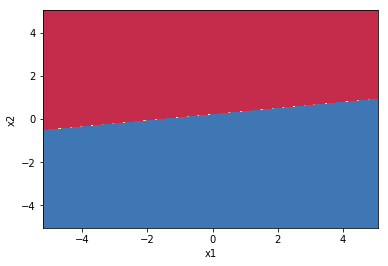

In [104]:
parameters = nn_model(X,Y,4,10000,print_cost=True)

plot_decision_boundary(lambda x:predict(parameters,x.T),X,Y)
plt.title('Decision Boundary for hidden layer size ',str(4))

predictions = predict(parameters,X)
acc = (np.dot(Y,predictions.T)+np.dot(1-Y,1-predicitons))/float(Y.size)*100
print('准确率%f'%acc)